### Specimen data, collectors, travel notes. 

How data from diffirent museums and archives can help researchers create diverse and rich narrative?

We start with the a famous museum specimen. *Tomistoma schlegelii* also known as false gharial, Malayan gharial, Sunda gharial. Currently, at Naturalis (Leiden), you can find this specimen (stuffed about one meter in size). Salomon Müller, a German naturalist used this specimen to describe the species. "The scientific name Crocodilus (Gavialis) schlegelii was proposed by Salomon Müller in 1838 who described a specimen collected in Borneo.[5] In 1846, he proposed to use the name Tomistoma schlegelii.[6]"

Named after Hermann Schlegel (1804-1884), then the museum's curator.

Müller (1804-1864) was one of eighteen scientists on the "Natuurkundige Commissie voor Nederlands-Indië". This commission, founded in 1820 by King William I, had the aim of describing the flora and fauna of the Dutch East Indies.


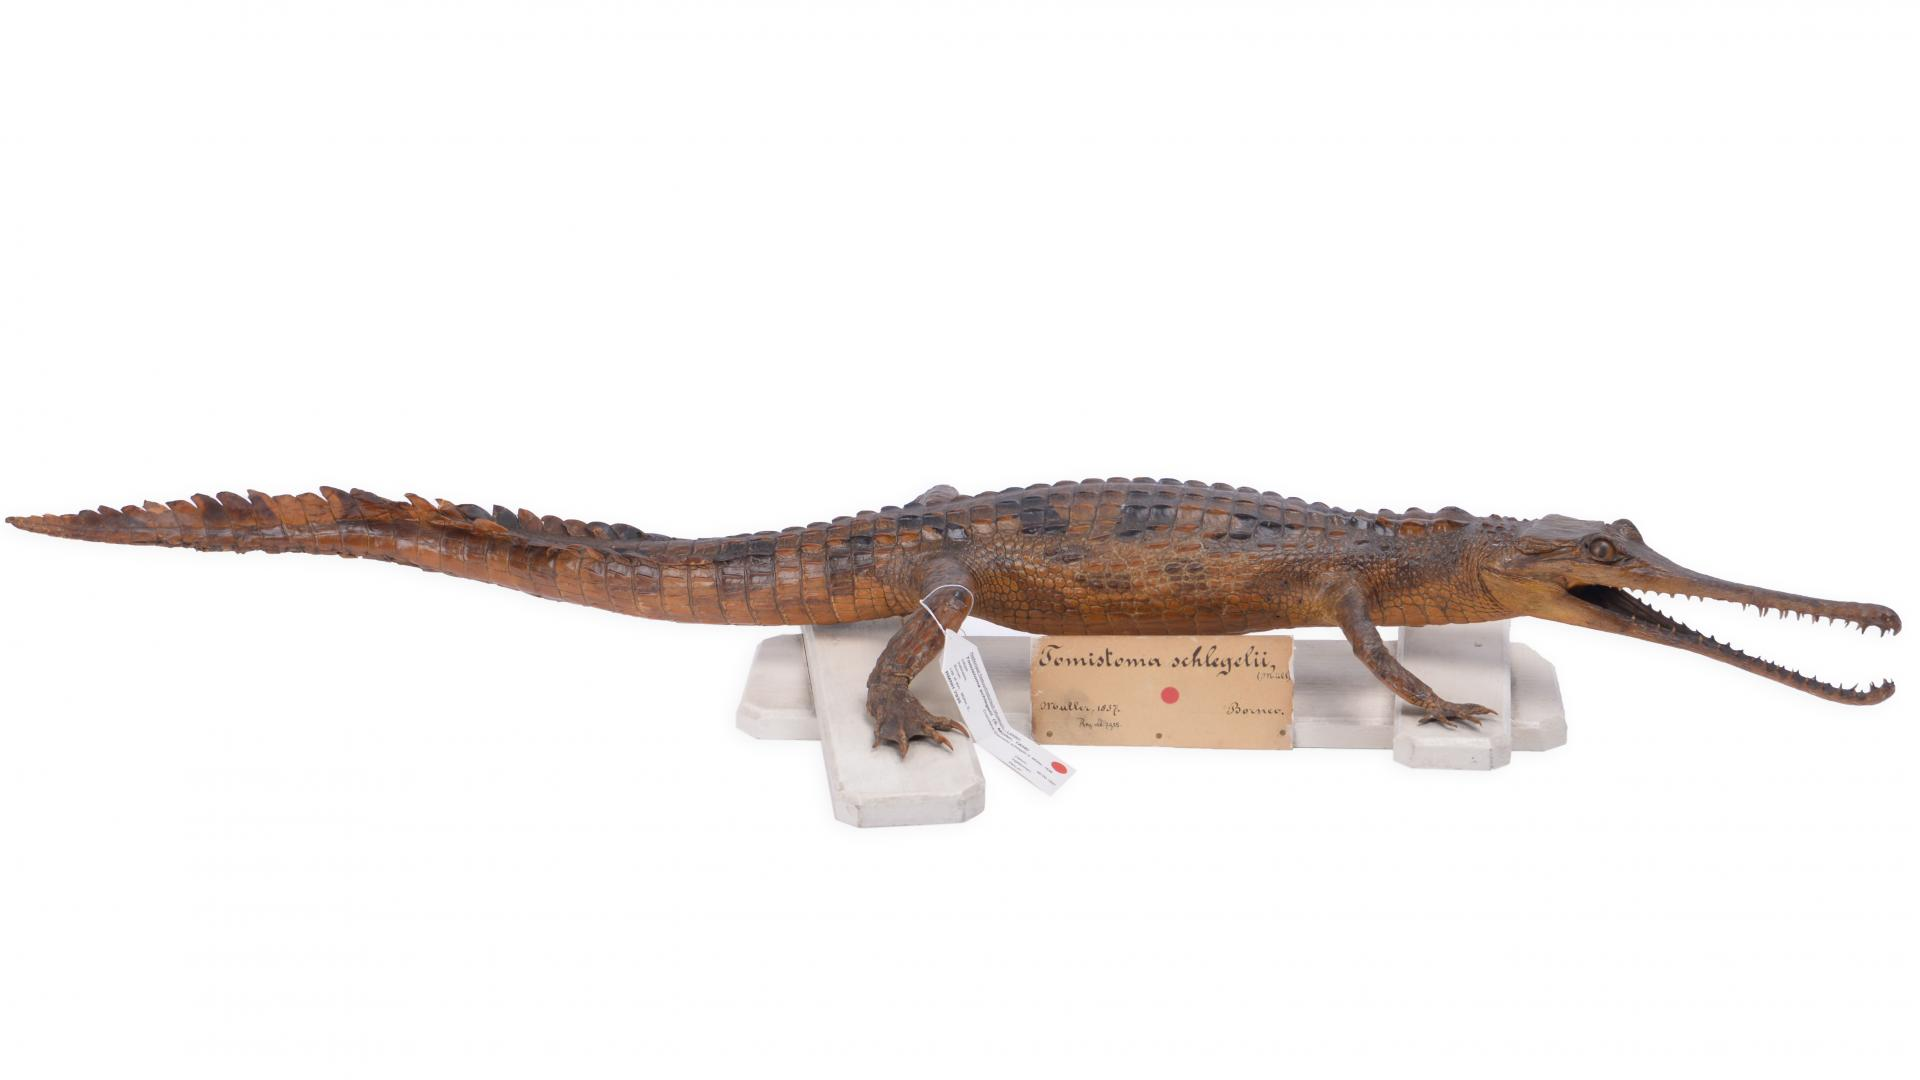

In [3]:



from IPython import display

display.Image("https://topstukken.naturalis.nl/assets/styles/specimen_header_1920/public/content/specimen/image/RMNH.RENA_.7935_HL_11.jpg",width="300",height="400")



There's a lot written about Salomon Müller but in order to link and disambiguate names (also issues with characters encoding issues such as  Müller vs Muller), identifiers play a key role. 

Wikidata identifiers are a great exmaple. 

Use of identifiers: example. Wikidata ID Q61390 (Salomon Müller) can be used to connected various specimens collected by this collector.  https://bionomia.net/Q61390/specimens.json

In [4]:
# Using the wikidata identifier I can get more information either from 
# wikidata or services like bionomia 
import json
from urllib.request import urlopen
response = urlopen('https://bionomia.net/Q61390/specimens.json')
bionomia_json_object = json.load(response)
print(json.dumps(bionomia_json_object['@reverse']['recorded'][1], indent=4, sort_keys=True))

{
    "@id": "https://bionomia.net/occurrence/2432550945",
    "@type": "PreservedSpecimen",
    "basisOfRecord": "PRESERVED_SPECIMEN",
    "catalogNumber": "RMNH.MAM.33657",
    "collectionCode": "Mammalia",
    "country": "Indonesia",
    "countryCode": "ID",
    "datasetKey": "009a76f6-0960-4a56-a116-63991e6bb037",
    "dateIdentified": null,
    "decimalLatitude": null,
    "decimalLongitude": null,
    "eventDate": null,
    "family": "Hipposideridae",
    "identifiedBy": null,
    "identifiedByID": null,
    "institutionCode": null,
    "kingdom": "Animalia",
    "license": "CC0_1_0",
    "occurrenceID": "https://data.biodiversitydata.nl/naturalis/specimen/RMNH.MAM.33657",
    "recordedBy": "M\u00fcller S.; Macklot H.C.",
    "recordedByID": null,
    "sameAs": "https://gbif.org/occurrence/2432550945",
    "scientificName": "Hipposideros ater amboinensis (Peters, 1871)",
    "typeStatus": "syntype",
    "year": null
}


From the "recordedBy" entry we can see  Müller worked with another scientist Macklot H.C. Again using wikidata identifier we can link these people. 

In [5]:
display.IFrame("https://bionomia.net/Q63424/co-collectors",width=500,height=600)

This gets bit tricky when we do not have identifiers. There could interesting applications of text mining and NLP tools to connect data elements from narratives. For instance, Pieter Van oort (https://bionomia.net/Q2094290) a painter also collaborated with Müller. Even though Van oort has a wikidata entry and we found at least one specimen (https://bioportal.naturalis.nl/specimen/RMNH.AVES.89394) attributed to his name, it is easy to build a network relationship like the above. Here's a wikidata entry for Van oort: 


"Op 4 juni 1833 begon een expeditie naar Sumatra. Tussen 1833 en 1834 was hij betrokken bij onderzoek langs de westkust van dit eiland. In de omgeving van Padang overleed hij aan 'galkoorts' (waarschijnlijk malaria, waaraan ook Heinrich Boie op 4 september 1827 overleed). Hij was toen ongehuwd, maar liet een dochtertje uit een buitenechtelijke relatie met een Indonesische vrouw achter. Het zelfportret werd naar Nederland gestuurd, eronder had hij geschreven: 'na mijne dood mijne ouders te zenden'."

transation: 

On June 4, 1833, an expedition to Sumatra began. Between 1833 and 1834 he was involved in research along the west coast of this island. In the vicinity of Padang he died of 'bile fever' (probably malaria, from which Heinrich Boie also died on September 4, 1827). He was unmarried at the time, but left behind a daughter from an extramarital relationship with an Indonesian woman. The self-portrait was sent to the Netherlands, under it he had written: 'to send my parents after my death'.



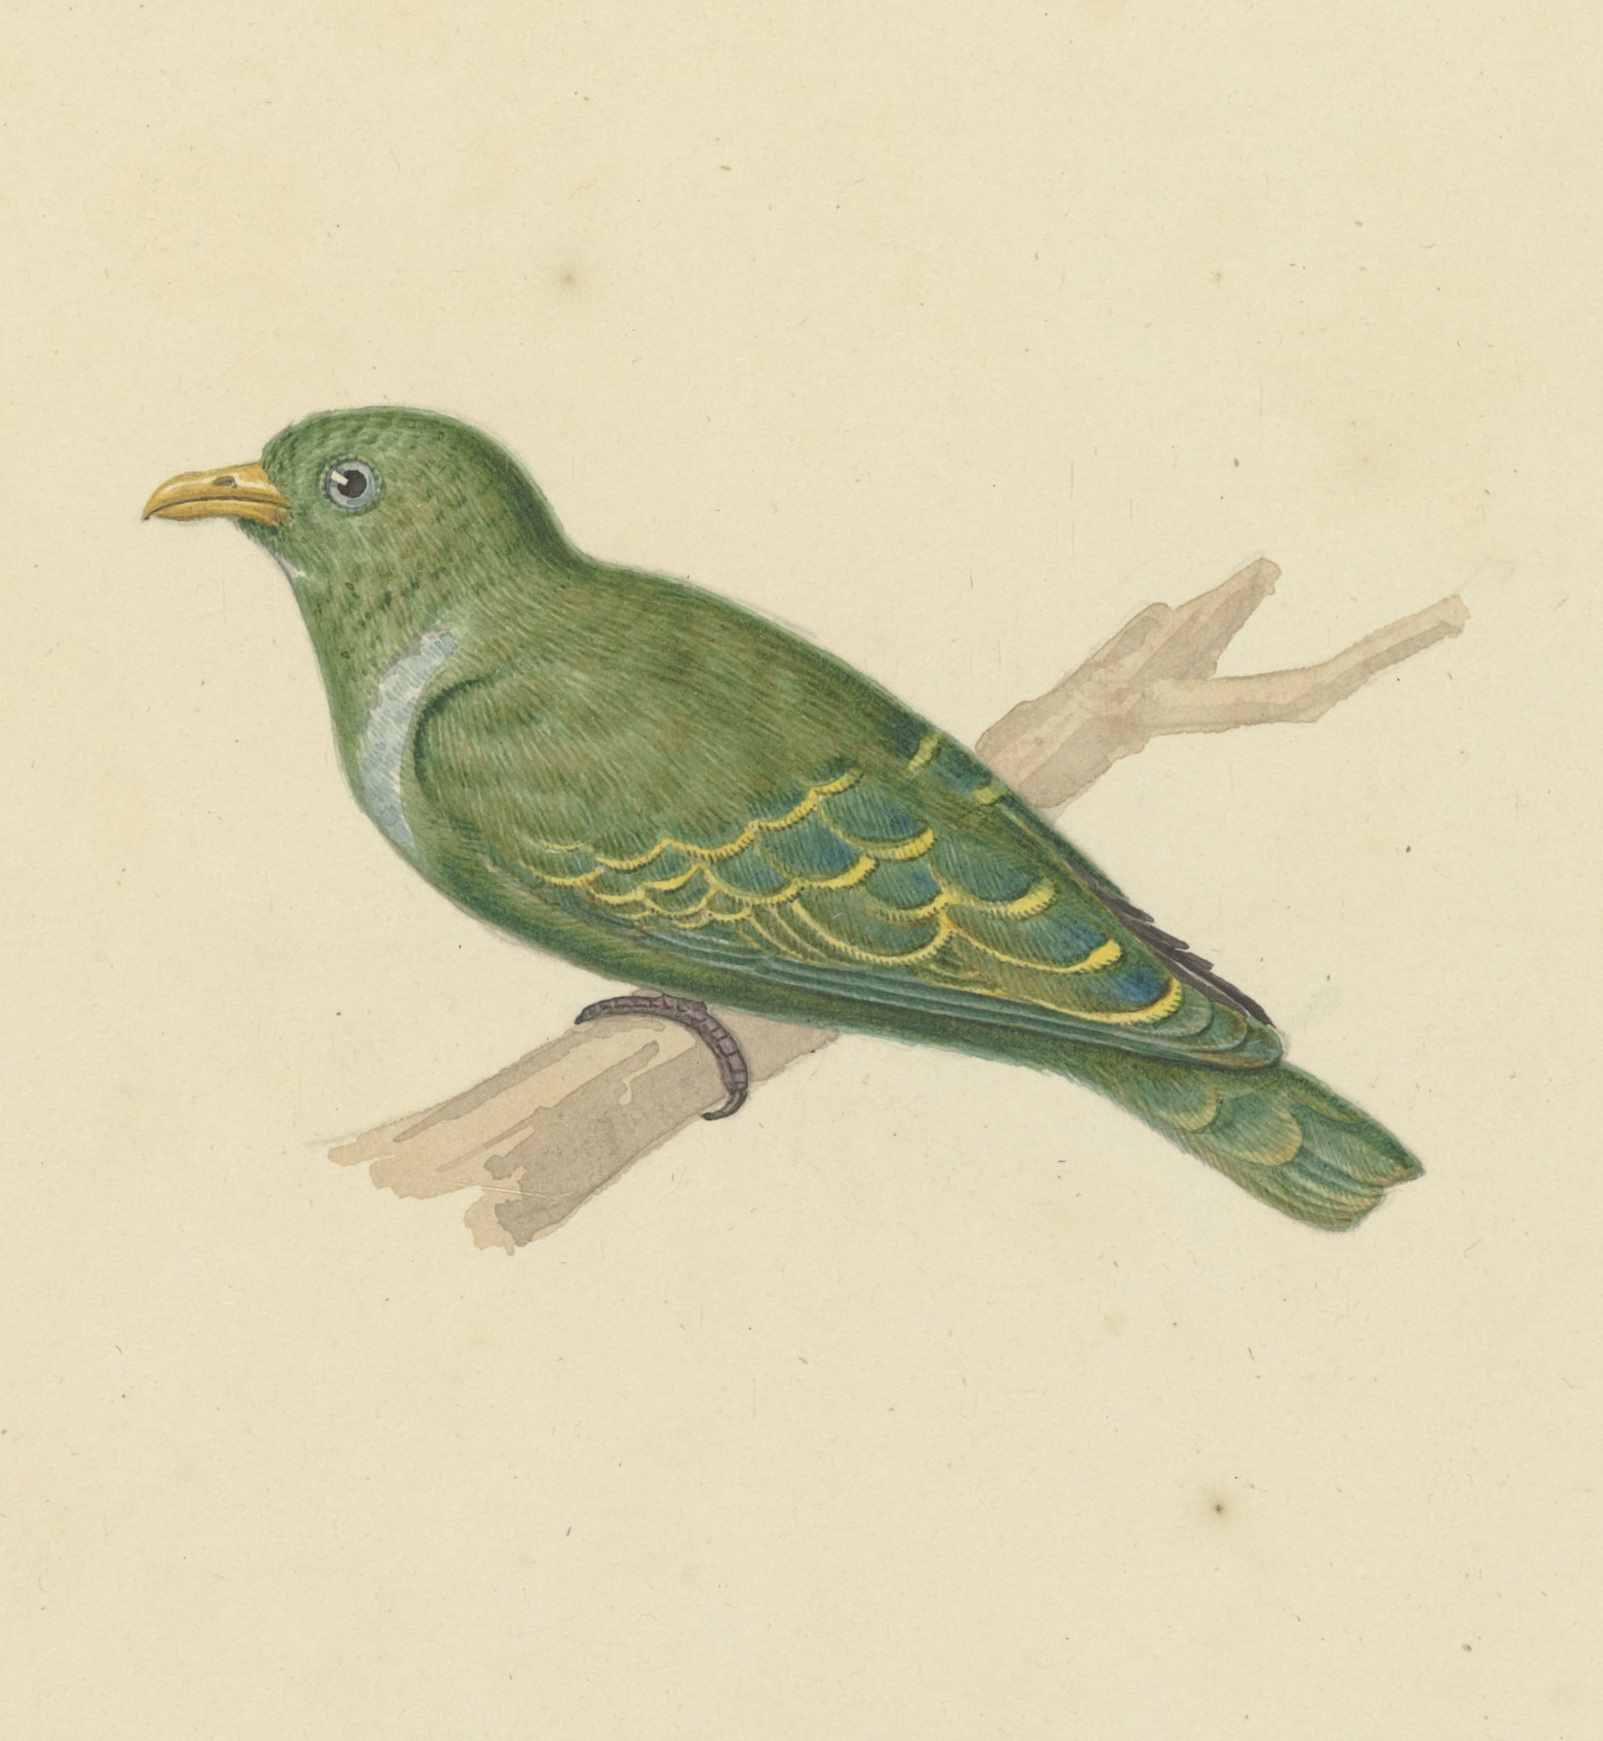

In [6]:
display.Image("https://upload.wikimedia.org/wikipedia/commons/e/ec/Naturalis_Biodiversity_Center_-_MMNAT01_AF_NNM001000076_-_Natuurkundige_Commissie_voor_Nederlandsch-Indi%C3%AB_-_Bird_species_-_Art_by_Oort%2C_P._van_%28cropped%29.jpg", width="200",height="200")

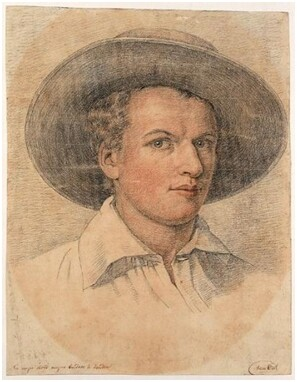

In [7]:
display.Image("https://abekpgaoen.cloudimg.io/v7/commons.wikimedia.org/wiki/Special:FilePath/PieterVanOort.jpg")


from Weber, A. and van Zanen, S., 2022. Matters of Perspective: Local Visual Expertise and Natural History Drawings in Java, 1820-1850. Wacana, 23(1), pp.38-63.

"In his diary, Van Oort describes the caravan and the role of Tsing Wang Ho to whom the draughtsman referred to as “onze Sinees” (our Chinese) or “mijn goede Sinees” (my dear Chinese) as follows: “Our company consisted of Mr [Salomon] Müller, our Chinese, Samaié, the brother of the Javanese head of Tjitjoeroeg, Müller’s servant, Asied (my loyal servant) and myself. Messers [Heinrich Christian] Macklot and [Pieter Willem] Korthals had already left yesterday with a couple of Javanese [...]”.5 Ultimately the caravan consisted of more than 150 people (Weber and Van Zanen 2021a: 102-103). To facilitate the Committee’s travels, the colonial government in Batavia had also asked all colonial administrators and owners of large tracts of private land in Preanger to assist the party on its journey."

From the above, it is clear that Müller, Van Oort, and Macklot where there. But it is hard to reflect these events with a data narrative. Also what about the other names mentioned here?  



In [8]:
import requests

class Tweet(object):
    def __init__(self, s, embed_str=False):
        if not embed_str:
            # Use Twitter's oEmbed API
            # https://dev.twitter.com/web/embedded-tweets
            api = 'https://publish.twitter.com/oembed?url={}'.format(s)
            response = requests.get(api)
            self.text = response.json()["html"]
        else:
            self.text = s

    def _repr_html_(self):
        return self.text

Tweet("https://mobile.twitter.com/a_nother_web/status/1524705067621883905")

In [9]:
#other data interactions 

# papers and image annotatinons mentioning this specimen or species 


from urllib.request import urlopen
response = urlopen('https://kubernetes.demo.nsidr.org/objects/test/10b827615f60f55cc3f1')
dissco_json_object = json.load(response)
print(json.dumps(dissco_json_object['ods:unmapped'],indent=4, sort_keys=True))

{
    "class": "Reptilia",
    "collectionCode": "Amphibia and Reptilia",
    "country": "Indonesia",
    "family": "Crocodylidae",
    "genus": "Tomistoma",
    "geodeticDatum": "WGS84",
    "higherClassification": "Reptilia|Crocodylia|Crocodylidae",
    "individualCount": "1",
    "license": "CC0 1.0",
    "locality": "Borneo, \"lake Lamoeda, 8days upstream riv.Doeson\"",
    "modified": "2020/09/29",
    "nomenclaturalCode": "ICZN",
    "ods:annotations": [
        {
            "ods:annotation": "\"Tomistoma schlegeli\" is also mentioned in this 1896 paper https://www.biodiversitylibrary.org/page/31200651\nProceedings of the Zoological Society of London (by George Albert Boulenger https://bionomia.net/Q435731)\nIt mentions about specimen in the Eeptile Gallery of the Natural History Museum: Excerpt from page 630:\n\"It is possibly referable to Tomistoma schlegeli, the Borneau Gavial, but the very meagre description of that species in my possession is insufficient to identify it.The

In [10]:
# pip install sparqlwrapper
# https://rdflib.github.io/sparqlwrapper/

#other interesting queries with wikidata

import sys
from SPARQLWrapper import SPARQLWrapper, JSON

endpoint_url = "https://query.wikidata.org/sparql"

query = """SELECT  ?item ?itemLabel WHERE {
  SERVICE wikibase:label { bd:serviceParam wikibase:language "[AUTO_LANGUAGE]". }
  {
    SELECT DISTINCT ?item WHERE {
      ?item p:P106 ?statement0.
      ?statement0 (ps:P106/(wdt:P279*)) wd:Q864503.
      {
        ?item p:P937 ?statement1.
        ?statement1 (ps:P937/(wdt:P279*)) wd:Q43631.
      }
      UNION
      {
        ?item p:P937 ?statement2.
        ?statement2 (ps:P937/(wdt:P279*)) wd:Q188161.
      }
      {
        ?item p:P569 ?statement_3.
        ?statement_3 psv:P569 ?statementValue_3.
        ?statementValue_3 wikibase:timePrecision ?precision_3.
        hint:Prior hint:rangeSafe "true"^^xsd:boolean.
        FILTER(?precision_3 >= 9 )
        ?statementValue_3 wikibase:timeValue ?P569_3.
        hint:Prior hint:rangeSafe "true"^^xsd:boolean.
        FILTER(?P569_3 < "+1900-00-00T00:00:00Z"^^xsd:dateTime)
      }
      UNION
      {
        ?item p:P106 ?statement4.
        ?statement4 (ps:P106/(wdt:P279*)) wd:Q18805.
      }
    }
    LIMIT 100
  }
}"""


def get_results(endpoint_url, query):
    user_agent = "WDQS-example Python/%s.%s" % (sys.version_info[0], sys.version_info[1])
    # TODO adjust user agent; see https://w.wiki/CX6
    sparql = SPARQLWrapper(endpoint_url, agent=user_agent)
    sparql.setQuery(query)
    sparql.setReturnFormat(JSON)
    return sparql.query().convert()


results = get_results(endpoint_url, query)

for result in results["results"]["bindings"]:
    print(result)

{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q26243145'}, 'itemLabel': {'type': 'literal', 'value': 'Q26243145'}}
{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q4491407'}, 'itemLabel': {'type': 'literal', 'value': 'Q4491407'}}
{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q61390'}, 'itemLabel': {'type': 'literal', 'value': 'Q61390'}}
{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q60616'}, 'itemLabel': {'type': 'literal', 'value': 'Q60616'}}
{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q2203935'}, 'itemLabel': {'type': 'literal', 'value': 'Q2203935'}}
{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q437466'}, 'itemLabel': {'type': 'literal', 'value': 'Q437466'}}
{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q382682'}, 'itemLabel': {'type': 'literal', 'value': 'Q382682'}}
{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q322636'}, 'i